## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [6]:
#Compile 模型
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 48s 965us/step - loss: 2.2760 - accuracy: 0.1671 - val_loss: 2.2262 - val_accuracy: 0.2004
Epoch 2/500
50000/50000 [==============================] - 50s 992us/step - loss: 2.1999 - accuracy: 0.2148 - val_loss: 2.1713 - val_accuracy: 0.2273
Epoch 3/500
50000/50000 [==============================] - 46s 928us/step - loss: 2.1483 - accuracy: 0.2424 - val_loss: 2.1243 - val_accuracy: 0.2550
Epoch 4/500
50000/50000 [==============================] - 43s 853us/step - loss: 2.1054 - accuracy: 0.2622 - val_loss: 2.0859 - val_accuracy: 0.2721
Epoch 5/500
50000/50000 [==============================] - 42s 850us/step - loss: 2.0694 - accuracy: 0.2769 - val_loss: 2.0522 - val_accuracy: 0.2856
Epoch 6/500
50000/50000 [==============================] - 43s 870us/step - loss: 2.0392 - accuracy: 0.2897 - val_loss: 2.0243 - val_accuracy: 0.2965
Epoch 7/500
50000/50000 [=========================

50000/50000 [==============================] - 42s 833us/step - loss: 1.6828 - accuracy: 0.4172 - val_loss: 1.6883 - val_accuracy: 0.4105
Epoch 55/500
50000/50000 [==============================] - 42s 835us/step - loss: 1.6793 - accuracy: 0.4180 - val_loss: 1.6882 - val_accuracy: 0.4113
Epoch 56/500
50000/50000 [==============================] - 44s 876us/step - loss: 1.6764 - accuracy: 0.4186 - val_loss: 1.6839 - val_accuracy: 0.4129
Epoch 57/500
50000/50000 [==============================] - 41s 821us/step - loss: 1.6729 - accuracy: 0.4200 - val_loss: 1.6802 - val_accuracy: 0.4137
Epoch 58/500
50000/50000 [==============================] - 40s 807us/step - loss: 1.6699 - accuracy: 0.4215 - val_loss: 1.6796 - val_accuracy: 0.4146
Epoch 59/500
50000/50000 [==============================] - 40s 796us/step - loss: 1.6667 - accuracy: 0.4213 - val_loss: 1.6737 - val_accuracy: 0.4181
Epoch 60/500
50000/50000 [==============================] - 41s 811us/step - loss: 1.6634 - accuracy: 0.421

50000/50000 [==============================] - 49s 980us/step - loss: 1.5451 - accuracy: 0.4619 - val_loss: 1.5666 - val_accuracy: 0.4505
Epoch 109/500
50000/50000 [==============================] - 49s 981us/step - loss: 1.5428 - accuracy: 0.4619 - val_loss: 1.5651 - val_accuracy: 0.4517
Epoch 110/500
50000/50000 [==============================] - 49s 987us/step - loss: 1.5411 - accuracy: 0.4636 - val_loss: 1.5642 - val_accuracy: 0.4549
Epoch 111/500
50000/50000 [==============================] - 50s 991us/step - loss: 1.5388 - accuracy: 0.4644 - val_loss: 1.5639 - val_accuracy: 0.4535
Epoch 112/500
50000/50000 [==============================] - 56s 1ms/step - loss: 1.5369 - accuracy: 0.4650 - val_loss: 1.5604 - val_accuracy: 0.4562
Epoch 113/500
50000/50000 [==============================] - 52s 1ms/step - loss: 1.5348 - accuracy: 0.4658 - val_loss: 1.5591 - val_accuracy: 0.4552
Epoch 114/500
50000/50000 [==============================] - 52s 1ms/step - loss: 1.5331 - accuracy: 0.466

50000/50000 [==============================] - 17s 337us/step - loss: 1.4516 - accuracy: 0.4932 - val_loss: 1.5029 - val_accuracy: 0.4694
Epoch 163/500
50000/50000 [==============================] - 17s 336us/step - loss: 1.4498 - accuracy: 0.4947 - val_loss: 1.4948 - val_accuracy: 0.4725
Epoch 164/500
50000/50000 [==============================] - 17s 338us/step - loss: 1.4480 - accuracy: 0.4947 - val_loss: 1.4924 - val_accuracy: 0.4741
Epoch 165/500
50000/50000 [==============================] - 17s 336us/step - loss: 1.4466 - accuracy: 0.4941 - val_loss: 1.4924 - val_accuracy: 0.4722
Epoch 166/500
50000/50000 [==============================] - 17s 339us/step - loss: 1.4452 - accuracy: 0.4952 - val_loss: 1.4939 - val_accuracy: 0.4694
Epoch 167/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.4436 - accuracy: 0.4957 - val_loss: 1.4894 - val_accuracy: 0.4745
Epoch 168/500
50000/50000 [==============================] - 18s 358us/step - loss: 1.4419 - accuracy:

Epoch 216/500
50000/50000 [==============================] - 18s 370us/step - loss: 1.3726 - accuracy: 0.5207 - val_loss: 1.4405 - val_accuracy: 0.4876
Epoch 217/500
50000/50000 [==============================] - 19s 373us/step - loss: 1.3717 - accuracy: 0.5201 - val_loss: 1.4479 - val_accuracy: 0.4850
Epoch 218/500
50000/50000 [==============================] - 19s 373us/step - loss: 1.3698 - accuracy: 0.5211 - val_loss: 1.4466 - val_accuracy: 0.4876
Epoch 219/500
50000/50000 [==============================] - 19s 371us/step - loss: 1.3692 - accuracy: 0.5220 - val_loss: 1.4524 - val_accuracy: 0.4831
Epoch 220/500
50000/50000 [==============================] - 19s 384us/step - loss: 1.3669 - accuracy: 0.5231 - val_loss: 1.4378 - val_accuracy: 0.4900
Epoch 221/500
50000/50000 [==============================] - 19s 377us/step - loss: 1.3658 - accuracy: 0.5236 - val_loss: 1.4420 - val_accuracy: 0.4840
Epoch 222/500
50000/50000 [==============================] - 19s 379us/step - loss: 1.36

Epoch 270/500
50000/50000 [==============================] - 18s 361us/step - loss: 1.3033 - accuracy: 0.5446 - val_loss: 1.4044 - val_accuracy: 0.5013
Epoch 271/500
50000/50000 [==============================] - 19s 372us/step - loss: 1.3016 - accuracy: 0.5463 - val_loss: 1.4171 - val_accuracy: 0.4980
Epoch 272/500
50000/50000 [==============================] - 18s 369us/step - loss: 1.3010 - accuracy: 0.5447 - val_loss: 1.4021 - val_accuracy: 0.5044
Epoch 273/500
50000/50000 [==============================] - 20s 402us/step - loss: 1.2997 - accuracy: 0.5468 - val_loss: 1.3988 - val_accuracy: 0.5014
Epoch 274/500
50000/50000 [==============================] - 18s 359us/step - loss: 1.2977 - accuracy: 0.5464 - val_loss: 1.4012 - val_accuracy: 0.5004
Epoch 275/500
50000/50000 [==============================] - 18s 354us/step - loss: 1.2969 - accuracy: 0.5468 - val_loss: 1.4118 - val_accuracy: 0.4971
Epoch 276/500
50000/50000 [==============================] - 17s 340us/step - loss: 1.29

50000/50000 [==============================] - 20s 401us/step - loss: 1.2402 - accuracy: 0.5670 - val_loss: 1.3703 - val_accuracy: 0.5167
Epoch 324/500
50000/50000 [==============================] - 18s 360us/step - loss: 1.2396 - accuracy: 0.5666 - val_loss: 1.3702 - val_accuracy: 0.5145
Epoch 325/500
50000/50000 [==============================] - 19s 381us/step - loss: 1.2382 - accuracy: 0.5661 - val_loss: 1.4066 - val_accuracy: 0.5044
Epoch 326/500
50000/50000 [==============================] - 21s 412us/step - loss: 1.2372 - accuracy: 0.5667 - val_loss: 1.3770 - val_accuracy: 0.5141
Epoch 327/500
50000/50000 [==============================] - 20s 403us/step - loss: 1.2359 - accuracy: 0.5678 - val_loss: 1.3704 - val_accuracy: 0.5155
Epoch 328/500
50000/50000 [==============================] - 19s 373us/step - loss: 1.2351 - accuracy: 0.5686 - val_loss: 1.3675 - val_accuracy: 0.5141
Epoch 329/500
50000/50000 [==============================] - 19s 378us/step - loss: 1.2349 - accuracy:

50000/50000 [==============================] - 19s 378us/step - loss: 1.1821 - accuracy: 0.5870 - val_loss: 1.3522 - val_accuracy: 0.5182
Epoch 377/500
50000/50000 [==============================] - 18s 366us/step - loss: 1.1820 - accuracy: 0.5872 - val_loss: 1.3694 - val_accuracy: 0.5145
Epoch 378/500
50000/50000 [==============================] - 19s 382us/step - loss: 1.1811 - accuracy: 0.5878 - val_loss: 1.3674 - val_accuracy: 0.5175
Epoch 379/500
50000/50000 [==============================] - 18s 366us/step - loss: 1.1797 - accuracy: 0.5883 - val_loss: 1.3548 - val_accuracy: 0.5216
Epoch 380/500
50000/50000 [==============================] - 19s 378us/step - loss: 1.1781 - accuracy: 0.5893 - val_loss: 1.3790 - val_accuracy: 0.5068
Epoch 381/500
50000/50000 [==============================] - 19s 381us/step - loss: 1.1776 - accuracy: 0.5891 - val_loss: 1.3730 - val_accuracy: 0.5162
Epoch 382/500
50000/50000 [==============================] - 56s 1ms/step - loss: 1.1766 - accuracy: 0

50000/50000 [==============================] - 17s 344us/step - loss: 1.1262 - accuracy: 0.6073 - val_loss: 1.3771 - val_accuracy: 0.5170
Epoch 431/500
50000/50000 [==============================] - 18s 352us/step - loss: 1.1255 - accuracy: 0.6077 - val_loss: 1.3546 - val_accuracy: 0.5259
Epoch 432/500
50000/50000 [==============================] - 18s 368us/step - loss: 1.1224 - accuracy: 0.6094 - val_loss: 1.3622 - val_accuracy: 0.5187
Epoch 433/500
50000/50000 [==============================] - 18s 368us/step - loss: 1.1224 - accuracy: 0.6075 - val_loss: 1.3438 - val_accuracy: 0.5256
Epoch 434/500
50000/50000 [==============================] - 18s 358us/step - loss: 1.1222 - accuracy: 0.6092 - val_loss: 1.3519 - val_accuracy: 0.5224
Epoch 435/500
50000/50000 [==============================] - 18s 355us/step - loss: 1.1203 - accuracy: 0.6095 - val_loss: 1.3349 - val_accuracy: 0.5301
Epoch 436/500
50000/50000 [==============================] - 17s 348us/step - loss: 1.1195 - accuracy:

Epoch 484/500
50000/50000 [==============================] - 17s 343us/step - loss: 1.0708 - accuracy: 0.6266 - val_loss: 1.3590 - val_accuracy: 0.5221
Epoch 485/500
50000/50000 [==============================] - 19s 376us/step - loss: 1.0717 - accuracy: 0.6272 - val_loss: 1.3398 - val_accuracy: 0.5321
Epoch 486/500
50000/50000 [==============================] - 19s 374us/step - loss: 1.0676 - accuracy: 0.6287 - val_loss: 1.3539 - val_accuracy: 0.5214
Epoch 487/500
50000/50000 [==============================] - 17s 336us/step - loss: 1.0670 - accuracy: 0.6281 - val_loss: 1.3795 - val_accuracy: 0.5183
Epoch 488/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.0631 - accuracy: 0.6296 - val_loss: 1.3523 - val_accuracy: 0.5285
Epoch 489/500
50000/50000 [==============================] - 17s 333us/step - loss: 1.0647 - accuracy: 0.6287 - val_loss: 1.3309 - val_accuracy: 0.5349
Epoch 490/500
50000/50000 [==============================] - 17s 331us/step - loss: 1.06

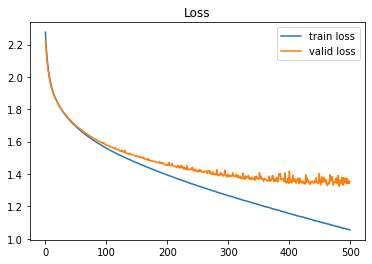

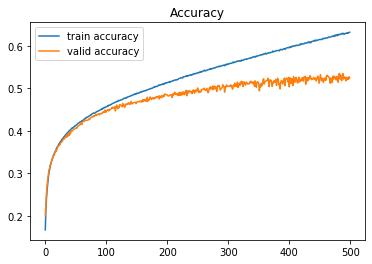

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()